## I would like to perform data exploration along with data cleaning and eventually some predictions.

## I have retrieved this dataset from Kaggle, where I will insert the details of the data dictionary here:

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.


In [119]:
import numpy as np
import pandas as pd

In [120]:
# import dataset

tswift = pd.read_csv('/Users/jacquelinesaquibal/Downloads/taylor_swift_spotify.csv')

tswift.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,72,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,73,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,73,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,72,193289


Below we can see that there aren't any null values in any columns, so we won't need to replace or remove these for data cleaning.

In [121]:
tswift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        530 non-null    int64  
 1   name              530 non-null    object 
 2   album             530 non-null    object 
 3   release_date      530 non-null    object 
 4   track_number      530 non-null    int64  
 5   id                530 non-null    object 
 6   uri               530 non-null    object 
 7   acousticness      530 non-null    float64
 8   danceability      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  valence           530 non-null    float64
 16  popularity        530 non-null    int64  
 1

I want to remove some unecessary columns that I don't want to analyze within this project.  I will remove `id`, `uri`, and `Unnamed: 0`

In [122]:
# Use .drop() to remove columns from the dataframe
tswift = tswift.drop(labels = ['id','uri','Unnamed: 0'],axis=1)

In [123]:
tswift

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,72,212600
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,73,231833
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,73,235800
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,72,193289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Our Song,Taylor Swift,2006-10-24,11,0.111000,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,74,201106
526,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,59,213053
527,Invisible,Taylor Swift,2006-10-24,13,0.637000,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,56,203226
528,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,0.003490,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,54,220146


Double check we don't have duplicates in the data

In [124]:
duplicated_rows = len(tswift[tswift.duplicated()])
duplicated_rows

0

I would like to see which 5 songs have the highest popularity.

In [125]:
max_danceability = tswift.nlargest(5, 'danceability')
max_danceability

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
281,I Think He Knows,Lover,2019-08-23,6,0.00889,0.897,0.366,0.000353,0.0715,-8.029,0.0569,100.003,0.416,76,173386
95,Vigilante Shit,Midnights (3am Edition),2022-10-22,8,0.16000,0.870,0.279,0.000017,0.1210,-11.134,0.3640,79.996,0.160,67,164801
72,Vigilante Shit,Midnights (The Til Dawn Edition),2023-05-26,8,0.15700,0.867,0.272,0.000034,0.1180,-11.014,0.3630,79.962,0.157,67,164801
348,Hey Stephen,reputation Stadium Tour Surprise Song Playlist,2017-11-09,40,0.19100,0.843,0.541,0.000002,0.1080,-7.361,0.0318,116.001,0.838,30,256040
484,Hey Stephen,Fearless Platinum Edition,2008-11-11,10,0.16800,0.843,0.553,0.000003,0.1070,-7.348,0.0317,115.997,0.825,42,254320


So, the highest rated songs based on danceability are I Think He Knows, Vigilante Shit, and Hey Stephen.  However, I would consider both Vigilante Shit and Hey Stephen to be duplicates, since they are the same song, just on different albums. After some thought, I will remove duplicate song titles (I will still include Taylor's Version).

In [126]:
tswift = tswift.drop_duplicates('name',keep='first')

tswift.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 0 to 529
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              329 non-null    object 
 1   album             329 non-null    object 
 2   release_date      329 non-null    object 
 3   track_number      329 non-null    int64  
 4   acousticness      329 non-null    float64
 5   danceability      329 non-null    float64
 6   energy            329 non-null    float64
 7   instrumentalness  329 non-null    float64
 8   liveness          329 non-null    float64
 9   loudness          329 non-null    float64
 10  speechiness       329 non-null    float64
 11  tempo             329 non-null    float64
 12  valence           329 non-null    float64
 13  popularity        329 non-null    int64  
 14  duration_ms       329 non-null    int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 41.1+ KB


We can see that previously, we had a total of 530 entries, whereas now, we have 329 entries. That means there was a total of 201 duplicate songs that were removed from this DataFrame.

Now, let's try looking at the top 5 songs with the highest danceability ratings again.

In [127]:
max_danceability = tswift.nlargest(5, 'danceability')
max_danceability

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
281,I Think He Knows,Lover,2019-08-23,6,0.00889,0.897,0.366,0.000353,0.0715,-8.029,0.0569,100.003,0.416,76,173386
72,Vigilante Shit,Midnights (The Til Dawn Edition),2023-05-26,8,0.15700,0.867,0.272,0.000034,0.1180,-11.014,0.3630,79.962,0.157,67,164801
348,Hey Stephen,reputation Stadium Tour Surprise Song Playlist,2017-11-09,40,0.19100,0.843,0.541,0.000002,0.1080,-7.361,0.0318,116.001,0.838,30,256040
406,Treacherous - Original Demo Recording,Red (Deluxe Edition),2012-10-22,20,0.17500,0.828,0.640,0.000061,0.0996,-8.248,0.0355,109.993,0.519,35,239720
284,Cornelia Street,Lover,2019-08-23,9,0.78100,0.824,0.624,0.000189,0.1000,-9.728,0.0827,102.012,0.248,79,287266


I now want to explore which songs are the most popular overall.

In [128]:
max_popularity = tswift.nlargest(5, 'popularity')
max_popularity

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
277,Cruel Summer,Lover,2019-08-23,2,0.117,0.552,0.702,0.000021,0.1050,-5.707,0.1570,169.994,0.564,97,178426
278,Lover,Lover,2019-08-23,3,0.492,0.359,0.543,0.000016,0.1180,-7.582,0.0919,68.534,0.453,90,221306
297,Don’t Blame Me,reputation,2017-11-10,4,0.106,0.615,0.534,0.000018,0.0607,-6.719,0.0386,135.917,0.193,89,236413
299,Look What You Made Me Do,reputation,2017-11-10,6,0.204,0.766,0.709,0.000014,0.1260,-6.471,0.1230,128.070,0.506,86,211853
51,Enchanted (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,9,0.012,0.505,0.532,0.000000,0.1490,-3.526,0.0265,81.907,0.216,85,353253


In [129]:
max_valence = tswift.nlargest(5, 'valence')
max_valence

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
360,Shake It Off,1989 (Deluxe Edition),2014-10-27,6,0.0647,0.647,0.800,0.000000,0.3340,-5.384,0.1650,160.078,0.942,55,219200
395,Stay Stay Stay,Red (Deluxe Edition),2012-10-22,9,0.3070,0.729,0.748,0.000001,0.0900,-6.670,0.0245,99.981,0.928,44,204826
190,closure,evermore (deluxe version),2021-01-07,14,0.8350,0.689,0.704,0.000005,0.1340,-10.813,0.2450,151.884,0.920,67,180653
5,Shake It Off (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,6,0.0121,0.636,0.808,0.000022,0.3590,-5.693,0.0729,160.058,0.917,71,219209
283,Paper Rings,Lover,2019-08-23,8,0.0129,0.811,0.719,0.000014,0.0742,-6.553,0.0497,103.979,0.865,84,222400


In [130]:
max_speechiness = tswift.nlargest(5, 'speechiness')
max_speechiness

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
372,I Wish You Would - Voice Memo,1989 (Deluxe Edition),2014-10-27,18,0.717,0.781,0.357,0.000000,0.1850,-16.394,0.912,118.317,0.645,37,107133
373,Blank Space - Voice Memo,1989 (Deluxe Edition),2014-10-27,19,0.801,0.675,0.234,0.000000,0.6570,-15.064,0.721,127.296,0.578,38,131186
371,I Know Places - Voice Memo,1989 (Deluxe Edition),2014-10-27,17,0.829,0.592,0.128,0.000000,0.5270,-17.932,0.589,78.828,0.150,39,216333
276,I Forgot That You Existed,Lover,2019-08-23,1,0.298,0.664,0.316,0.000002,0.0812,-10.345,0.519,92.875,0.541,74,170640
72,Vigilante Shit,Midnights (The Til Dawn Edition),2023-05-26,8,0.157,0.867,0.272,0.000034,0.1180,-11.014,0.363,79.962,0.157,67,164801


## Now, I am interested to see if any of these attributes are good predictors of a song's popularity. 

### Our target attribute (variable we want to predict) will be popularity

In [131]:
# save popularity column as a Series named label
label = tswift['popularity'].squeeze()

# drop popularity column from the rest of the data and call it features
features = tswift.drop(columns=['popularity'])

### Split data into a training set and a test set

In [132]:
# split data with 80% of the instances allocated to training and 20% to testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [133]:
X_train.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
129,Stay Stay Stay (Taylor's Version),Red (Taylor's Version),2021-11-12,9,0.08480,0.693,0.681,0.000000,0.0768,-7.039,0.0250,100.020,0.663,205786
286,London Boy,Lover,2019-08-23,11,0.02460,0.695,0.710,0.000104,0.1330,-6.639,0.0500,157.925,0.557,190240
17,Say Don't Go (Taylor's Version) (From The Vault),1989 (Taylor's Version) [Deluxe],2023-10-27,18,0.06600,0.633,0.551,0.000010,0.1270,-8.297,0.0341,109.950,0.164,279833
45,Back To December (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,3,0.00621,0.497,0.635,0.000000,0.1170,-3.927,0.0273,142.063,0.203,294189
282,Miss Americana & The Heartbreak Prince,Lover,2019-08-23,7,0.02800,0.662,0.747,0.006150,0.1380,-6.926,0.0736,150.088,0.487,234146


In [134]:
# make a copy of the X_train data set
data = X_train.copy()

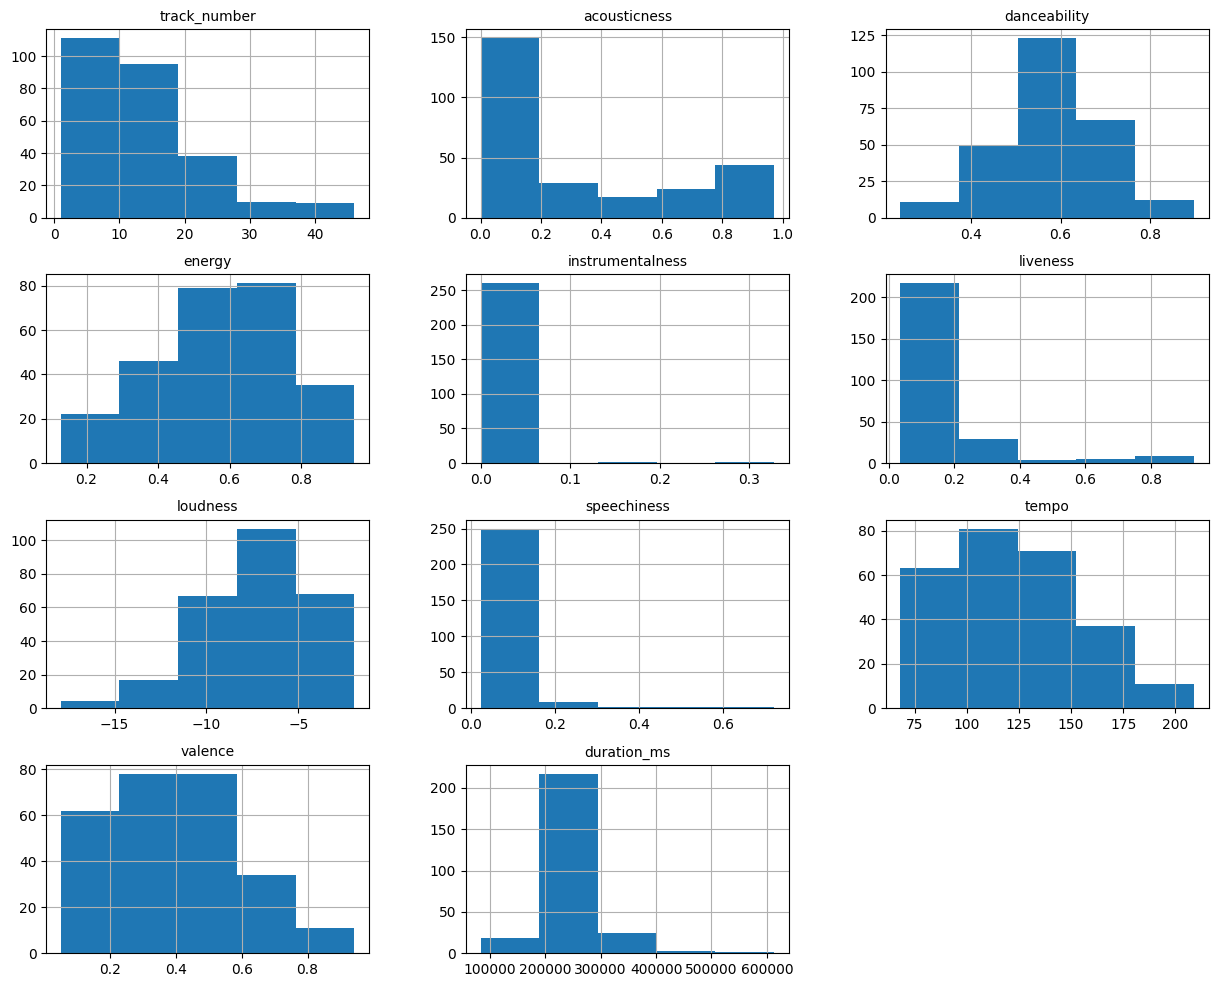

In [135]:
import matplotlib.pyplot as plt


plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


data.hist(bins=5, figsize=(15, 12))
plt.show()

In [136]:
# numerical variables

attribs = ['track_number', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','duration_ms']

corr_matrix = data[attribs].corr()

In [137]:
corr_matrix['loudness'].sort_values(ascending=False)

loudness            1.000000
energy              0.796950
valence             0.353826
tempo               0.193255
track_number        0.065818
duration_ms         0.042672
liveness            0.020369
danceability       -0.047797
instrumentalness   -0.192607
speechiness        -0.296234
acousticness       -0.708605
Name: loudness, dtype: float64

## Prepare the Data

In [138]:
#convert DataFrame to NumPy array

array = data.to_numpy()
array

array([["Stay Stay Stay (Taylor's Version)", "Red (Taylor's Version)",
        '2021-11-12', ..., 100.02, 0.663, 205786],
       ['London Boy', 'Lover', '2019-08-23', ..., 157.925, 0.557, 190240],
       ["Say Don't Go (Taylor's Version) (From The Vault)",
        "1989 (Taylor's Version) [Deluxe]", '2023-10-27', ..., 109.95,
        0.164, 279833],
       ...,
       ['The Way I Loved You (Taylor’s Version)',
        "Fearless (Taylor's Version)", '2021-04-09', ..., 161.032, 0.472,
        243136],
       ['The Moment I Knew', 'Red (Deluxe Edition)', '2012-10-22', ...,
        126.015, 0.275, 285560],
       ['You Belong With Me (Taylor’s Version)',
        "Fearless (Taylor's Version)", '2021-04-09', ..., 130.033, 0.474,
        231124]], dtype=object)

In [139]:
data = data[['track_number', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','duration_ms']]
data

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
129,9,0.08480,0.693,0.681,0.000000,0.0768,-7.039,0.0250,100.020,0.663,205786
286,11,0.02460,0.695,0.710,0.000104,0.1330,-6.639,0.0500,157.925,0.557,190240
17,18,0.06600,0.633,0.551,0.000010,0.1270,-8.297,0.0341,109.950,0.164,279833
45,3,0.00621,0.497,0.635,0.000000,0.1170,-3.927,0.0273,142.063,0.203,294189
282,7,0.02800,0.662,0.747,0.006150,0.1380,-6.926,0.0736,150.088,0.487,234146
...,...,...,...,...,...,...,...,...,...,...,...
290,15,0.13000,0.756,0.449,0.000000,0.1140,-8.746,0.0344,111.011,0.399,223293
125,5,0.01710,0.440,0.528,0.002030,0.2340,-7.809,0.0317,185.972,0.132,329160
160,10,0.00330,0.402,0.732,0.000000,0.1080,-4.665,0.0484,161.032,0.472,243136
403,17,0.18700,0.620,0.506,0.000015,0.1020,-7.327,0.0312,126.015,0.275,285560


In [140]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler())



In [141]:
from sklearn.compose import ColumnTransformer

num_attributes = ['track_number', 'acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','duration_ms']

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attributes)])

print(preprocessing)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['track_number', 'acousticness',
                                  'danceability', 'energy', 'instrumentalness',
                                  'liveness', 'loudness', 'speechiness',
                                  'tempo', 'valence', 'duration_ms'])])


In [142]:
X_train_prepared = preprocessing.fit_transform(X_train)

# Create DataFrame to view the data in an easier format
X_train_prepared = pd.DataFrame(X_train_prepared)
X_train_prepared

,0,1,2,3,4,5,6,7,8,9,10
0,-0.418726,-0.668317,0.996206,0.550446,-0.122103,-0.599363,0.079517,-0.441283,-0.753754,1.354524,-0.727817
1,-0.200224,-0.854230,1.013946,0.704487,-0.117977,-0.248319,0.221712,-0.096272,1.116772,0.816118,-1.030892
2,0.564532,-0.726376,0.463988,-0.140086,-0.121709,-0.285797,-0.367686,-0.315699,-0.432982,-1.180048,0.715756
3,-1.074231,-0.911023,-0.742373,0.306104,-0.122103,-0.348260,1.185794,-0.409542,0.604376,-0.981955,0.995632
4,-0.637228,-0.843730,0.721226,0.901023,0.121876,-0.217087,0.119687,0.229418,0.863611,0.460567,-0.174929
...,...,...,...,...,...,...,...,...,...,...,...
258,0.236779,-0.528727,1.555035,-0.681887,-0.122103,-0.366999,-0.527300,-0.311559,-0.398708,0.013589,-0.386512
259,-0.855729,-0.877392,-1.247981,-0.262256,-0.041570,0.382560,-0.194208,-0.348820,2.022784,-1.342585,1.677405
260,-0.309475,-0.920010,-1.585052,0.821346,-0.122103,-0.404477,0.923444,-0.118353,1.217138,0.384378,0.000335
261,0.455281,-0.352696,0.348674,-0.379116,-0.121520,-0.441955,-0.022863,-0.355720,0.085972,-0.616245,0.827406


### Now, I will see which statistical method best works with our data.

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# instantiate a Logistic Regression Class 
# increasing the maximum number of iterations taken for the solvers to converge
log_clf = LogisticRegression(random_state=42, max_iter=1000)

# fit the model
log_clf.fit(X_train_prepared, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [144]:
predictions = log_clf.predict(X_train_prepared)

# check RMSE scores - a score closer to 0 indicates more accurate predictions

log_mse = mean_squared_error(y_train,predictions)

log_rmse = np.sqrt(log_mse)
log_rmse

17.613834003106007

In [145]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_prepared, y_train)


LinearRegression()

In [146]:
predictions = lin_reg.predict(X_train_prepared)

lin_mse = mean_squared_error(y_train,predictions)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

14.284996601319516

In [147]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X=X_train_prepared, y=y_train)



DecisionTreeRegressor()

In [148]:
predictions = tree_reg.predict(X_train_prepared)

tree_mse = mean_squared_error(y_true = y_train, y_pred = predictions)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [149]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(X=X_train_prepared,y=y_train)




RandomForestRegressor()

In [150]:
forest_mse = mean_squared_error(y_true= y_train, y_pred = forest_reg.predict(X=X_train_prepared))

forest_rmse = np.sqrt(forest_mse)
forest_rmse

5.545712590540744

In [151]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = lin_reg, X = X_train_prepared, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
linreg_rmse_scores = np.sqrt(-scores)
linreg_rmse_scores

array([14.07041334, 15.31436793, 15.64671551])

In [152]:
scores = cross_val_score(estimator = tree_reg, X = X_train_prepared, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([18.39157416, 20.48419568, 18.8530311 ])

In [153]:
scores = cross_val_score(estimator = forest_reg, X = X_train_prepared, y=y_train,scoring = 'neg_mean_squared_error',cv=3)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([14.36913849, 15.17117782, 14.32307603])

In [154]:
# Using GridSarchCV to search for the best hyperparameters. We input what hyperparameters to try,
# and it will then use cross-validation to evaluate all the possible combinations of values.

from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4,6]}]

# prepare data
data_prepared = preprocessing.fit_transform(X_train)

# instantiate model
forest_reg = RandomForestRegressor(random_state=42)

# instantiate grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

# run grid search
grid_search.fit(data_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [155]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [156]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [157]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

16.76306110788902 {'max_features': 2, 'n_estimators': 3}
15.173404732479023 {'max_features': 2, 'n_estimators': 10}
15.005062098050786 {'max_features': 2, 'n_estimators': 30}
16.631890908562486 {'max_features': 4, 'n_estimators': 3}
15.271418778061197 {'max_features': 4, 'n_estimators': 10}
14.916159510612676 {'max_features': 4, 'n_estimators': 30}
16.997002591078108 {'max_features': 6, 'n_estimators': 3}
15.225388763175813 {'max_features': 6, 'n_estimators': 10}
14.868636625596023 {'max_features': 6, 'n_estimators': 30}
16.321965179814455 {'max_features': 8, 'n_estimators': 3}
15.440404580642738 {'max_features': 8, 'n_estimators': 10}
14.753401489391397 {'max_features': 8, 'n_estimators': 30}
16.746970303685494 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
15.555850056246486 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
16.02140712334286 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
15.385237679722026 {'bootstrap': False, 'max_features': 3, 'n_e

In [158]:
# looking at the feature importance scores
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.21805811, 0.08532148, 0.07494856, 0.08820267, 0.04021841,
       0.1222462 , 0.09068071, 0.11208185, 0.04421904, 0.07800245,
       0.04602052])

In [159]:
# displays the feature importance scores next to their attribute names
#cat_encoder = preprocessing.named_transformers_["cat"]
attributes = num_attributes 
sorted(zip(feature_importances, attributes), reverse=True)

[(0.21805811145437684, 'track_number'),
 (0.12224619526662216, 'liveness'),
 (0.11208184664112723, 'speechiness'),
 (0.09068071324967036, 'loudness'),
 (0.08820266509563884, 'energy'),
 (0.08532148089485107, 'acousticness'),
 (0.07800245359338155, 'valence'),
 (0.07494856393485234, 'danceability'),
 (0.046020517629134235, 'duration_ms'),
 (0.044219042663917976, 'tempo'),
 (0.040218409576427305, 'instrumentalness')]

### In conclusion, it can be seen that track_number best correlates with the popularity variable, but it still is not a very good predictor.  These extremely low feature importance scores from each variable tells us that not one variable necessarily predicts the popularity of a Taylor Swift song.  Which means all of her most popular songs most likely have very differnt vibes!